# Assignment 2. 
1. 1주차 과제 의 데이터를 가지고 선형회귀에 필요한 EDA 및 전처리 및 인코딩
    - 범주형 변수 인코딩 3개 이상, EDA 3개 이상  
    1주차 과제 적극적으로 활용 가능 및 자신이 만든 Feature 역시 사용 가능
2. 선형회귀분석을 배웠으니 1 주차 데이터를 다양한 방식으로 선형회귀분석 ! (Target: Hammer Price)
3. 적합된 회귀식에 대해 데이터의 행렬을 통해 < MSE > 구하여 위의 값과 비교 (24 25 참고)
    - 3번의 경우, sklearn을 사용하지 않고 행렬을 통해 값 추출하기
    
---

- Auction_key : 경매 아파트 고유 키값
- Auction_class : 강제경매, 임의경매
    - 강제경매 : 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매진행
    - 임의경매 : 등기부등본 담보권(저당권, 가압류 등)으로 경매 진행
- Bid_class : 입찰구분(일반, 개별, 일괄)
- Claim_price : 경매 신청인의 청구 금액
- Appraisal_company : 감정사
- Appraisal_date : 감정일자
- Auction_count : 총경매횟수
- Auction_miscarriage_count : 총유찰횟수
- Total_land_gross_area : 총토지전체면적
- Total_land_real_area : 총토지실면적
- Total_land_auction_area : 총토지경매면적
- Total_building_area : 총건물면적
- Total_building_auction_area : 총건물경매면적
- Minimum_appraisal_price : 총감정가
- Minimum_sales_price : 입찰 시 입찰인이 최저로 제시해야만 하는 금액
- First_auction_date : 최초경매일
- Final_auction_date : 최종경매일
- Final_result : 최종결과
- Creditor : 채권자, 경매 신청인
- addr_do : 주소_시도
- addr_si : 주소_시군구
- addr_dong : 주소_읍면동
- addr_li : 주소_리
- addr_san : 주소_산번지 여부
- addr_bunji1 : 도로명주소_번지1
- addr_bunji2 : 도로명주소_번지2
- addr_etc : 주소_기타주소
- Apartment_usage : 건물(토지)의 대표 용도
- Completion_date : 준공일
- Preserve_regist_date : 보존등기일, 건물을 신축하고 처음으로 등기
- Total_floor : 총층수
- Current_floor : 현재층수
- Specific : 기타_특이사항
- Share_auction_YorN : 지분경매 여부
    - 하나의 부동산이 전체가 아닌 일부만 경매가 진행 (하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그중 일부 지분만 경매가 진행)
- road_name : 도로명주소_도로명
- road_bunji1 : 도로명주소_번지1
- road_bunji2 : 도로명주소_번지2
- Close_date : 종국일자
- Close_result : 종국결과
    - 낙찰과 배당의 차이 :  경매 진행은 ①경매진행(낙찰) ▷ ②낙찰허가결정 ▷ ③대금납부 ▷ ④배당 후 종결 로 이뤄집니다. 낙찰자가 최고가로 입찰(①)해서 낙찰허가(②)를 받으면 대금납부기한 낙찰금을 입금(③)합니다. 법원은 납부된 낙찰금을 가지고 채권자에게 순위에 의한 배당(④)을 해주고 경매는 종결됩니다.
- point.y : 위도
- point.x : 경도
- Hammer_price : 낙찰가

# Load Data

In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as lin

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Auction_master_train.csv')

In [3]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [4]:
df.shape

(1933, 41)

In [5]:
df.describe()

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,addr_bunji1,addr_bunji2,Total_floor,Current_floor,road_bunji1,road_bunji2,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1929.000000,889.000000,1933.000000,1933.000000,1909.000000,155.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,601.952307,22.742407,16.980859,8.817900,127.441069,12.748387,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,554.119824,67.000807,9.509021,8.044644,188.394217,10.735663,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,1.000000,1.000000,3.000000,0.000000,1.000000,1.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,189.000000,1.000000,12.000000,3.000000,24.000000,5.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,482.000000,5.000000,15.000000,7.000000,57.000000,9.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,834.000000,18.000000,21.000000,12.000000,145.000000,17.500000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,4937.000000,1414.000000,80.000000,65.000000,1716.000000,55.000000,37.685575,129.255872,1.515100e+10


In [6]:
df.info()
# float64(11), int64(9), object(21)
# object 타입의 데이터 모두 처리해야 한다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 41 columns):
Auction_key                    1933 non-null int64
Auction_class                  1933 non-null object
Bid_class                      1933 non-null object
Claim_price                    1933 non-null int64
Appraisal_company              1933 non-null object
Appraisal_date                 1933 non-null object
Auction_count                  1933 non-null int64
Auction_miscarriage_count      1933 non-null int64
Total_land_gross_area          1933 non-null float64
Total_land_real_area           1933 non-null float64
Total_land_auction_area        1933 non-null float64
Total_building_area            1933 non-null float64
Total_building_auction_area    1933 non-null float64
Total_appraisal_price          1933 non-null int64
Minimum_sales_price            1933 non-null int64
First_auction_date             1933 non-null object
Final_auction_date             1933 non-null object
Final_resu

In [7]:
# 결측치가 존재하는 feature 확인
df.isnull().sum()[df.isnull().sum() != 0]

addr_li        1910
addr_bunji1       4
addr_bunji2    1044
Specific       1869
road_bunji1      24
road_bunji2    1778
dtype: int64

In [8]:
# object 타입의 feature 확인
df.dtypes[df.dtypes == 'object']

Auction_class           object
Bid_class               object
Appraisal_company       object
Appraisal_date          object
First_auction_date      object
Final_auction_date      object
Final_result            object
Creditor                object
addr_do                 object
addr_si                 object
addr_dong               object
addr_li                 object
addr_san                object
addr_etc                object
Apartment_usage         object
Preserve_regist_date    object
Specific                object
Share_auction_YorN      object
road_name               object
Close_date              object
Close_result            object
dtype: object

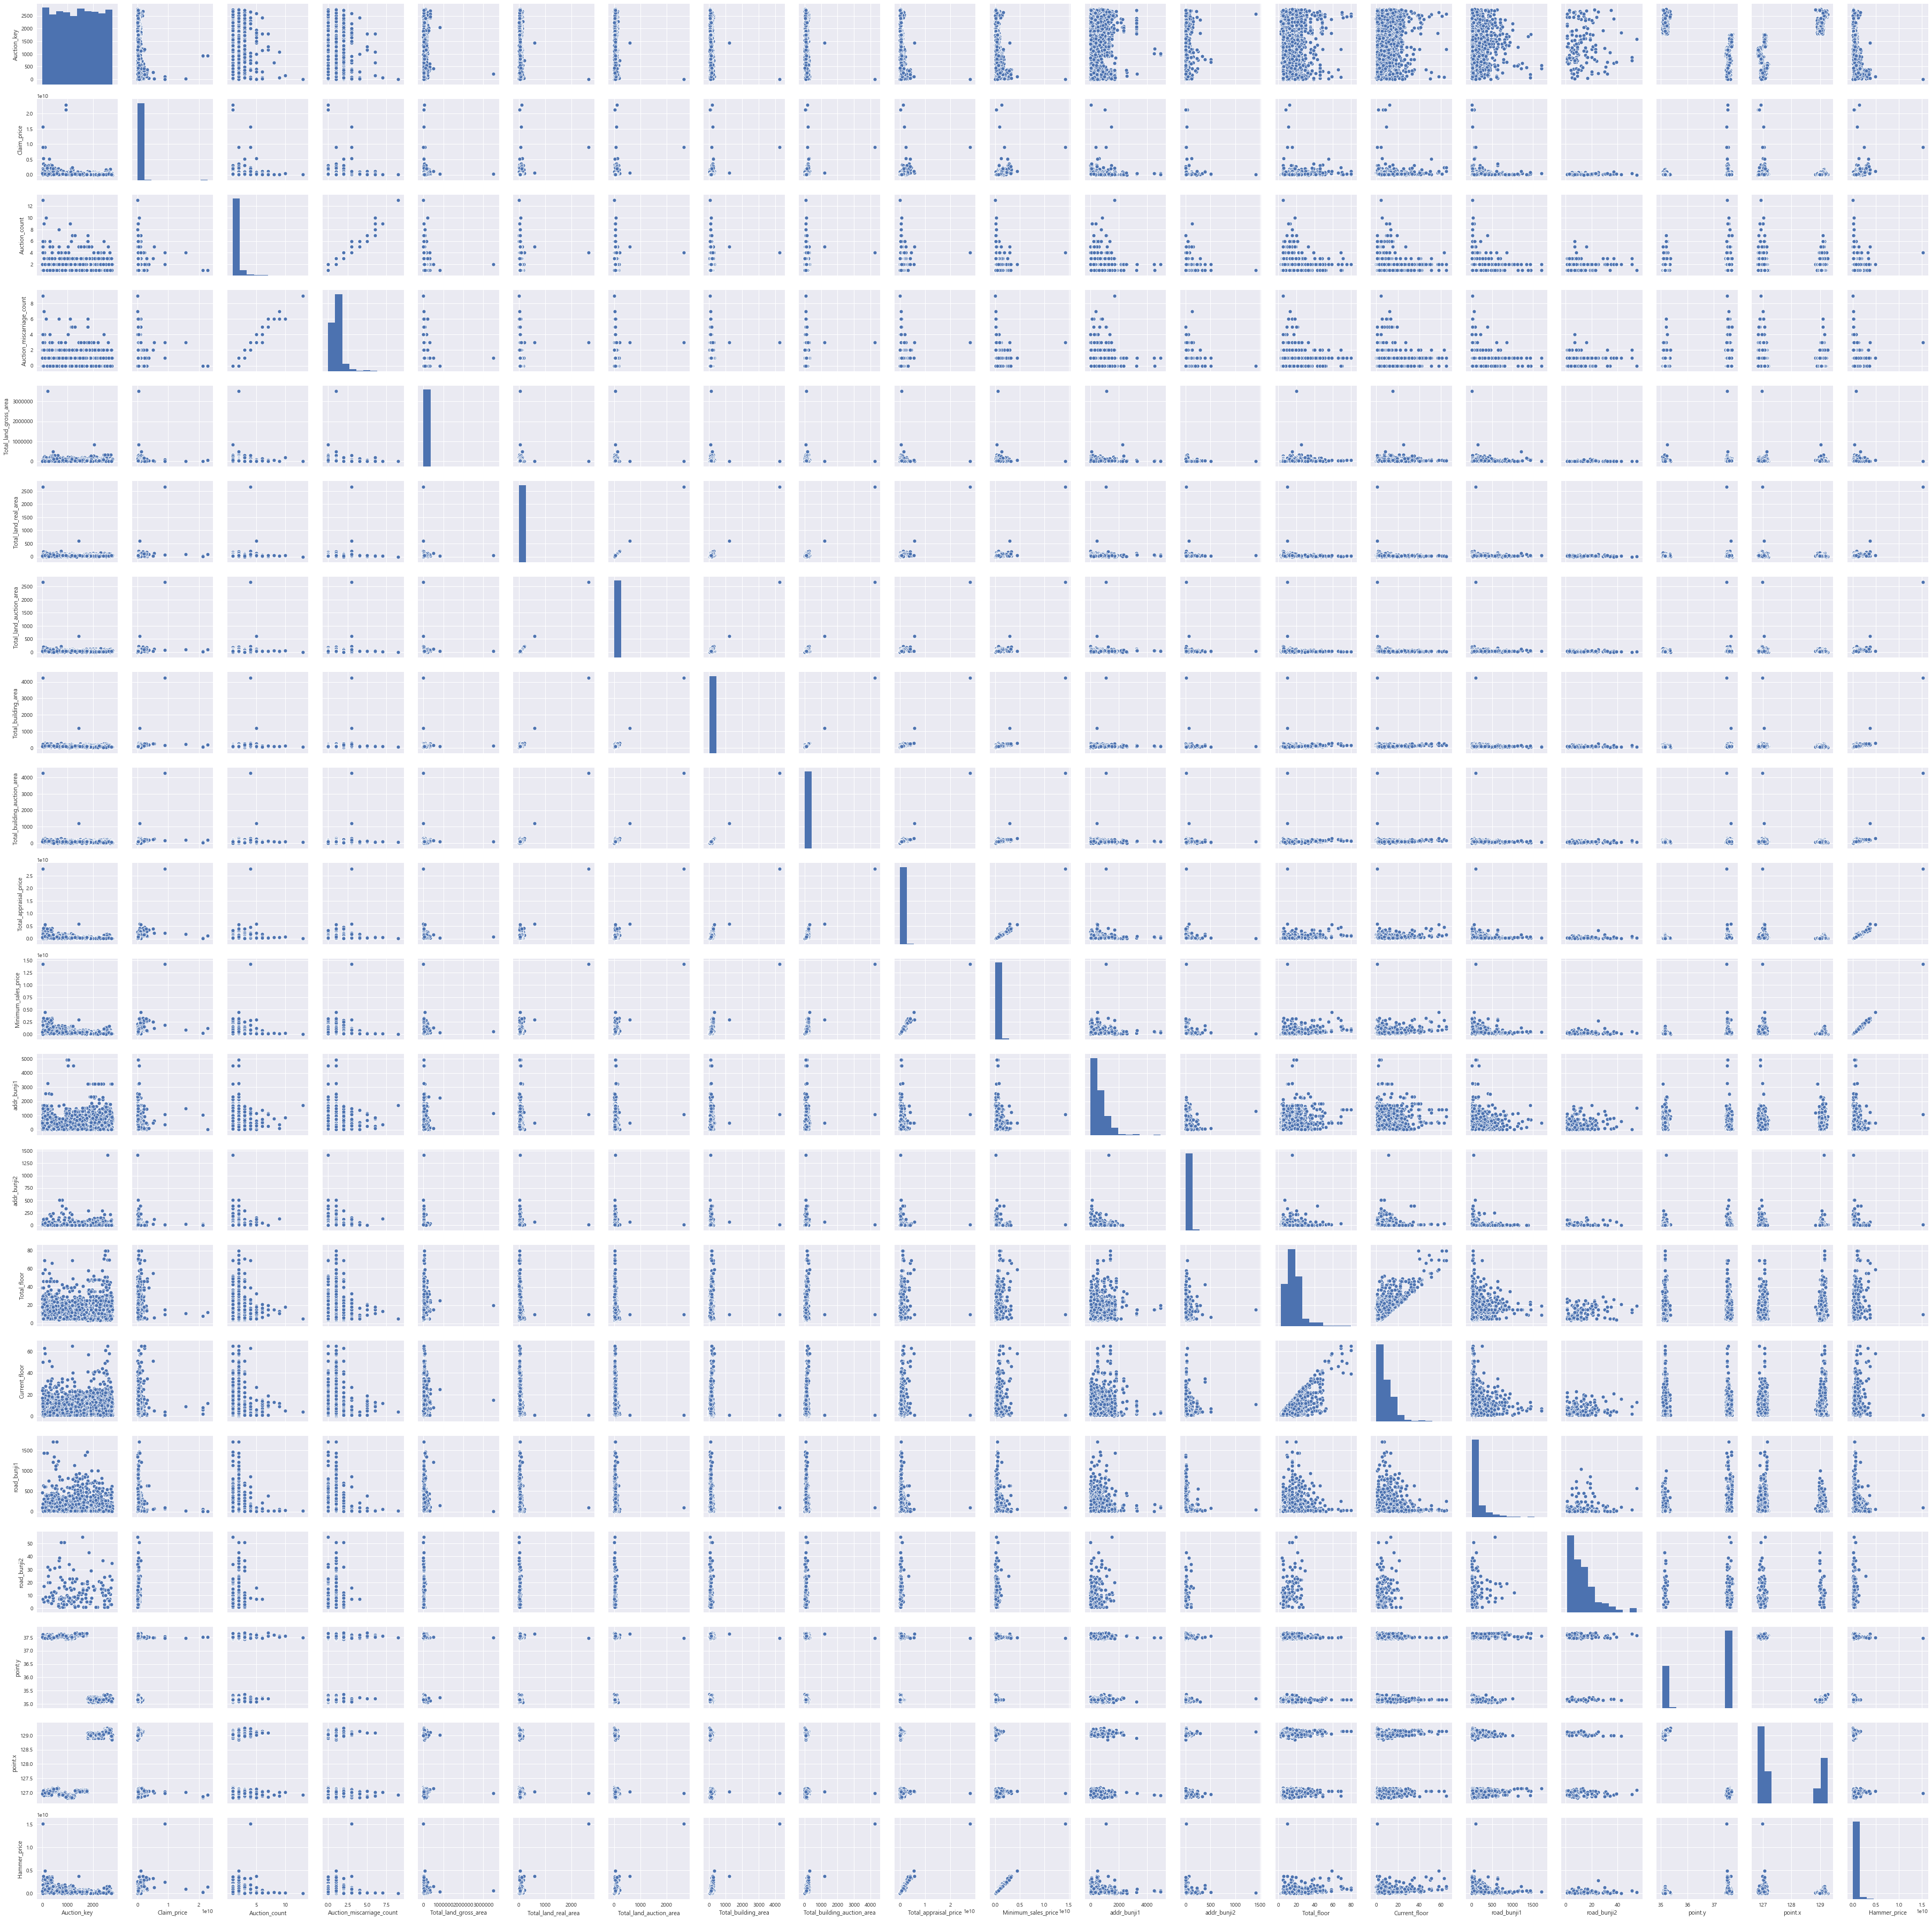

In [9]:
sns.pairplot(df)
df = df.drop(df['Hammer_price'].idxmax(), axis=0)
# 눈에 띄는 하나의 결측치를 제거한다.

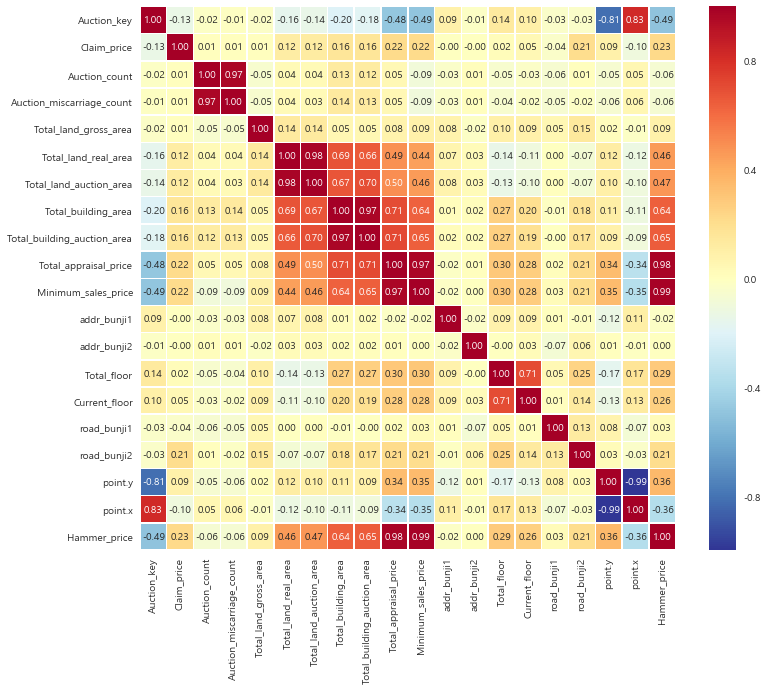

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap = 'RdYlBu_r', annot=True, fmt='.2f', linewidths=0.5)

# 반응변수(Hammer_price)와 강한 양의 상관관계를 가지는 feature가 더럿 보인다.
# Minimum_sales_price            0.994592
# Total_appraisal_price          0.953464
# Total_building_auction_area    0.772839
# Total_building_area            0.768454
# Total_land_auction_area        0.700639
# Total_land_real_area           0.696099

# 설명변수끼리도 강한 양의 상관관계를 보이는 변수가 있다.
# Auction_count - Auction_miscarriage_count (유찰횟수가 많았기 때문에 총 경매횟수가 많은건 자명하다)
# point.x - point.y (서울, 부산 지역의 데이터이기 때문에 자명하다.)
# Total_floor - Current_floor

# 설명변수끼리 강한 양의 상관관계를 가지는 feature가 몇몇 보인다.
# 다중공선성 문제는 추정의 분산을 크게 만드는 경향이 있으므로 처리해야 한다.

# Encoding

### 1. 날짜와 관련된 데이터 처리

In [11]:
# 범위 밖이라고 오류가 나기 때문에 '1111-11-11 00:00:00' 데이터 처리

# 종국 결과가 아직 없기 때문에 종국일자도 없는 것
# 실제 Close_result가 빈칸인 데이터의 인덱스와 Close_date가 '1111-11-11 00:00:00'인 데이터의 인덱스 동일
# -> df['Close_date'].max()로 대체하자. (가장 최근의 종국일자)
df.loc[df['Close_date'] == '1111-11-11 00:00:00', 'Close_date'] = df['Close_date'].max()
df['Preserve_regist_date'] = df['Preserve_regist_date'].replace('1111-11-11 00:00:00', np.nan)

date_columns = ['Final_auction_date', 'First_auction_date', 'Preserve_regist_date', 'Close_date', 'Appraisal_date']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [12]:
# First_auction_date와 Final_auction_date 이용해 Auction_period 생성
df['Auction_period'] = (df['Final_auction_date'] - df['First_auction_date']).apply(lambda x:x.days)

# 보존등기일로 부터 몇 년 전의 건물인지 대략적으로 수치화
# 기준일은 주어진 data에서 가장 최근의 날짜가 '2018-08-17 이므로' 2018-09-01로 설정
df['regist_period'] = pd.datetime(year=2018, month=9, day=1) - df['Preserve_regist_date'] 
df['regist_period'].fillna(df['regist_period'].mean(), inplace=True)
df['regist_period'] = df['regist_period'].apply(lambda x:x.days)

# 년도만 추출
df['Close_year'] = df['Close_date'].apply(lambda x:x.year)
df['Appraisal_year'] = df['Appraisal_date'].apply(lambda x:x.year)

In [13]:
# 날짜와 관련된 데이터 처리하였기 때문에 기존의 feature는 drop
df.drop(date_columns, axis=1, inplace=True)

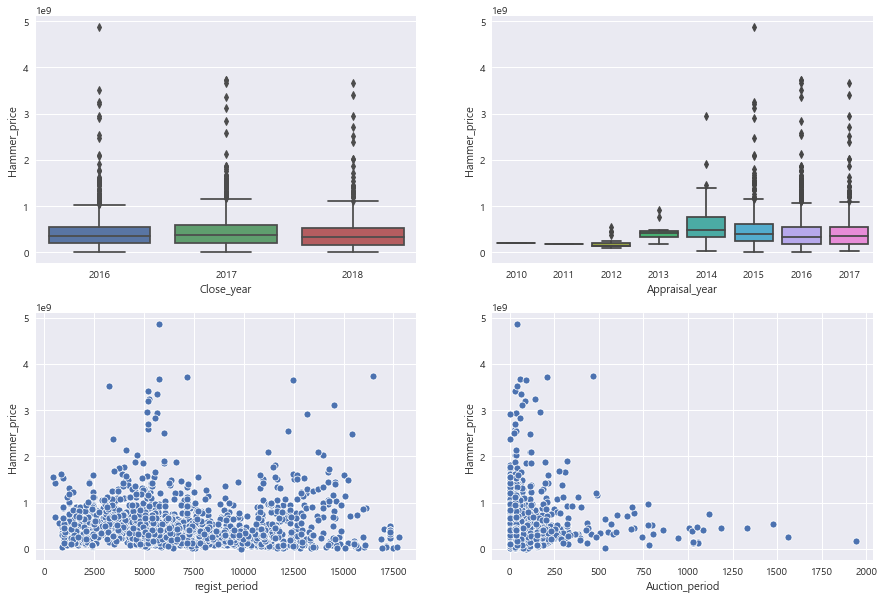

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Close year에 따라 Hammer_price의 차이는 그다지 없어보인다.
sns.boxplot(x='Close_year', y='Hammer_price', data=df, ax=axes[0][0])
# 연도 별 Hammer_price의 차이가 존재하나, 그 관계가 비선형적일 것으로 예상된다.
sns.boxplot(x='Appraisal_year', y='Hammer_price', data=df, ax=axes[0][1])
# 선형관계는 보이지 않는다.
sns.scatterplot(x='regist_period', y='Hammer_price', data=df, ax=axes[1][0])
# Auction period가 길어질수록 Hammer_price가 높은 경우는 점점 드물어짐
sns.scatterplot(x='Auction_period', y='Hammer_price', data=df, ax=axes[1][1])

### 2. 나머지 object 타입의 변수 encoding

In [15]:
bid_class = pd.get_dummies(df['Bid_class'], prefix='Bid_class').drop('Bid_class_일반', axis=1)
df = pd.concat([df, bid_class], axis=1)

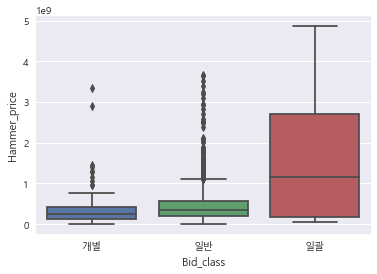

In [16]:
# Bid_class에 따라 Hammer price 차이 존재 (특히 개별,일반/일괄에서 차이 존재)
sns.boxplot(x='Bid_class', y='Hammer_price', data=df)

In [17]:
print( df['Final_result'].unique() ) # 1개 -> 뒤에서 column 제거 

['낙찰']


['부산' '서울']
unique한 addr_si의 수 = 39
data의 row 수 = 1932
unique한 addr_dong의 수 = 285


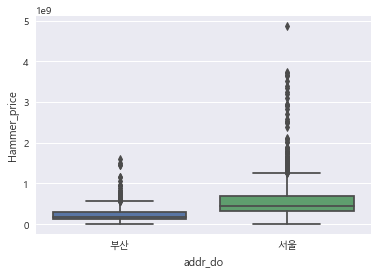

In [18]:
print( df['addr_do'].unique() )
df['addr_do_서울'] = df['addr_do'].apply(lambda x:1 if x=='서울' else 0)

print('unique한 addr_si의 수 = {}'.format(df['addr_si'].nunique()))

print('data의 row 수 = {}'.format(df.shape[0]))
print('unique한 addr_dong의 수 = {}'.format(df['addr_dong'].nunique()))

# ->  dong을 one-hot encoding 하기에는 데이터의 수에 비해 column이 너무 증가
# one-hot encoding 하지 않기도 한다.

# 서울, 부산 지역 사이 Hammer_price 차이 존재
sns.boxplot(x='addr_do', y='Hammer_price', data=df)

In [19]:
df['Auction_class'] = df['Auction_class'].apply(lambda x:1 if x=='임의' else 0)
df['addr_san'] = df['addr_san'].apply(lambda x:1 if x=='Y' else 0)
df['Apartment_usage'] = df['Apartment_usage'].apply(lambda x:1 if x=='아파트' else 0)
df['Share_auction_YorN'] = df['Share_auction_YorN'].apply(lambda x:1 if x=='Y' else 0)
df['Close_result'] = df['Close_result'].apply(lambda x:1 if x=='배당' else 0)

In [20]:
print("df['addr_li']의 결측치 비율 = {}".format(df['addr_li'].isna().sum()/df.shape[0]))
print("df['Specific']의 결측치 비율 = {}".format(df['Specific'].isna().sum()/df.shape[0]))

# 결측치라면 0, 결측치가 아니라면 1으로 변환
df.loc[df['addr_li'].notnull(), 'addr_li'] = 1
df.loc[df['addr_li'].isnull(), 'addr_li']  = 0

df.loc[df['Specific'].notnull(), 'Specific'] = 1
df.loc[df['Specific'].isnull(), 'Specific'] = 0

df['addr_li']의 결측치 비율 = 0.9880952380952381
df['Specific']의 결측치 비율 = 0.967391304347826


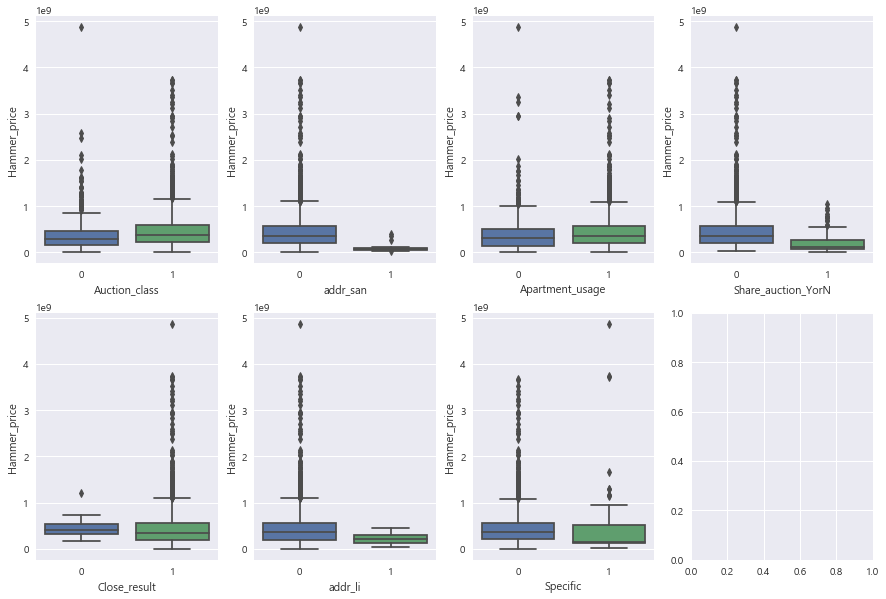

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
sns.boxplot(x='Auction_class', y='Hammer_price', data=df, ax=axes[0][0], )
sns.boxplot(x='addr_san', y='Hammer_price', data=df, ax=axes[0][1])
sns.boxplot(x='Apartment_usage', y='Hammer_price', data=df, ax=axes[0][2])
sns.boxplot(x='Share_auction_YorN', y='Hammer_price', data=df, ax=axes[0][3])
sns.boxplot(x='Close_result', y='Hammer_price', data=df, ax=axes[1][0])
sns.boxplot(x='addr_li', y='Hammer_price', data=df, ax=axes[1][1])
sns.boxplot(x='Specific', y='Hammer_price', data=df, ax=axes[1][2])

# 결측치 유무에 따라 변환했던 addr_li의 경우 Hammer_price의 분포에 차이가 존재한다.
# Specific 역시 결측치인 경우가 결측치가 아닌 경우에 비해 평균이 높다.

In [22]:
# 도로의 너비에 따른 순서형 범주형변수 생성 (3)
# 참고 : https://www.juso.go.kr/statis/statisRoadMain.do
# 대로 / 로 / 길 

def road_name_dummy(road_name):
    try:
        if road_name.endswith('대로'): 
            return 3
        elif road_name.endswith('로'): 
            return 2
        elif road_name.endswith('길'): 
            return 1
    except:
        return 2 # 결측치인 경우 중간길이 '로'로 변환
    
# 실제 결측치의 다른 주소 정보를 통해 대로, 로, 길에 대한 정보를 찾아본 결과
# '로'에 대응되는 경우가 많았기에 이렇게 처리하였다.
# (이보다 좋은 방법이 있을 것이라는 확신이 있기에 이는 한계점이라 생각한다.)

df['road_name'] = df['road_name'].apply(lambda x:road_name_dummy(x))

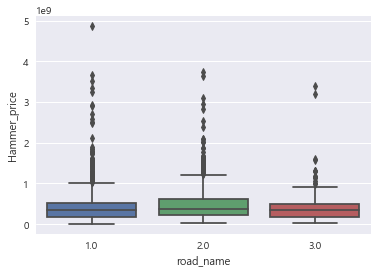

In [23]:
# '대로'에 있는 경우 Hammer_price가 더 높을 것이라 예상했지만, 생각보다 크게 차이는 없어보인다.
sns.boxplot(x='road_name', y='Hammer_price', data=df)

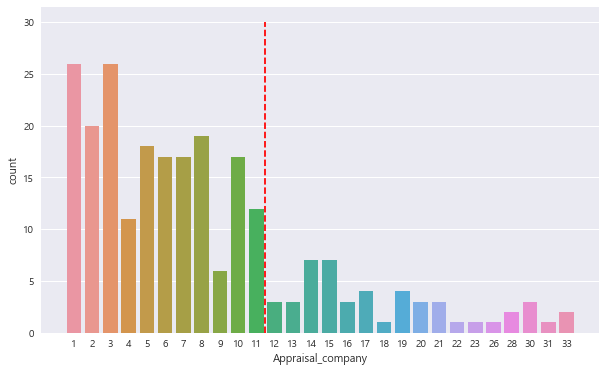

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Appraisal_company'].value_counts())
plt.vlines(x=10.5, ymin=0, ymax=30, color='red', linestyles='--')

In [25]:
# 17건 미만이면 0으로
# 17건 이상으면 1으로 인코딩

appraisal_company_value = df['Appraisal_company'].value_counts()
appraisal_company_dict = {}

for name, cnt in zip(appraisal_company_value.index.tolist(), appraisal_company_value.values.tolist()):
    if cnt <17:
        appraisal_company_dict[name] = 0
    else:
        appraisal_company_dict[name] = 1
        
df['Appraisal_company_size'] = df['Appraisal_company'].replace(appraisal_company_dict)

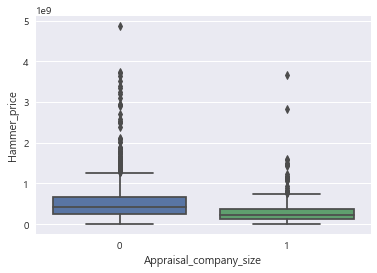

In [26]:
sns.boxplot(x='Appraisal_company_size', y='Hammer_price', data=df)

In [27]:
# encoding하기 힘들어 보이는 데이터는 제거
df.drop(['addr_etc', 'Appraisal_company'], axis=1, inplace=True)

In [28]:
del df['Bid_class']
del df['Final_result']
del df['addr_do']
del df['addr_si']
del df['addr_dong']
del df['Auction_key']
del df['addr_bunji1']
del df['addr_bunji2']
del df['road_name']
del df['road_bunji1']
del df['road_bunji2']

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('Hammer_price', axis=1)
y = df['Hammer_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Creditor (경매신청인) 정보 활용하기 -> DTM matrix, Tfidf matrix

In [30]:
# 코드 https://github.com/kihohan/Brand2Vec/blob/master/Brand2Vec.py
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [31]:
# dtm, tfidf matrix 만들기
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from konlpy.tag import Okt

# 특수문자, 숫자 제거
def preprocessing(X):
    X['Creditor'] = X['Creditor'].apply(lambda x:x.replace('Private', '기타'))
    X['Creditor'] = X['Creditor'].apply(lambda x:re.sub('[-=+,()#/&\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', x))
    X['Creditor'] = X['Creditor'].apply(lambda x:re.sub('[1-9]', '',x))
    return X

X_train = preprocessing(X_train)
X_test  = preprocessing(X_test)

okt = Okt()
def Okt_tokenizer(words):
    return okt.morphs(words)

cnt_vectorizer = CountVectorizer(tokenizer=Okt_tokenizer)
tfidf_vectorizer = TfidfVectorizer(tokenizer=Okt_tokenizer)

cnt_vectorizer.fit(X_train['Creditor'])
tfidf_vectorizer.fit(X_train['Creditor'])

train_dtm = cnt_vectorizer.transform(X_train['Creditor'])
train_tfidf = tfidf_vectorizer.transform(X_train['Creditor'])

train_dtm_matrix = pd.DataFrame(train_dtm.toarray())
train_tfidf_matrix = pd.DataFrame(train_tfidf.toarray())

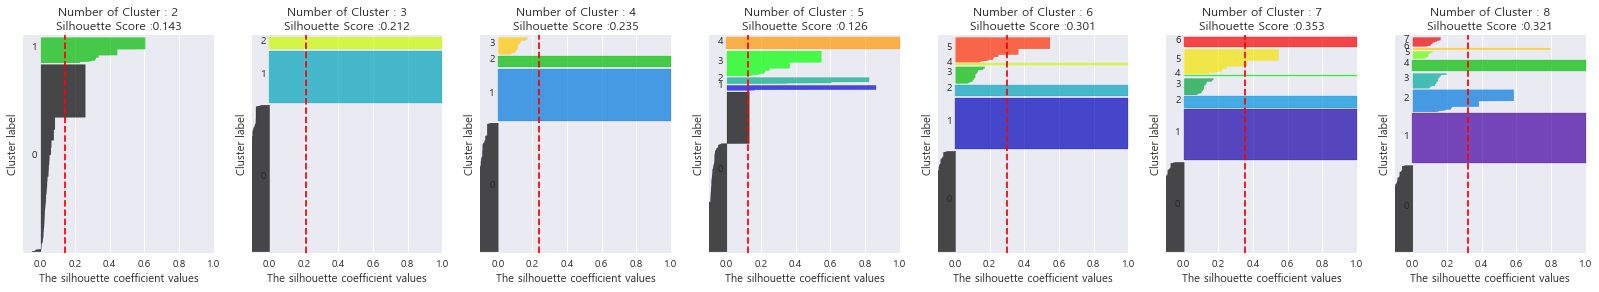

In [32]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], train_dtm_matrix)

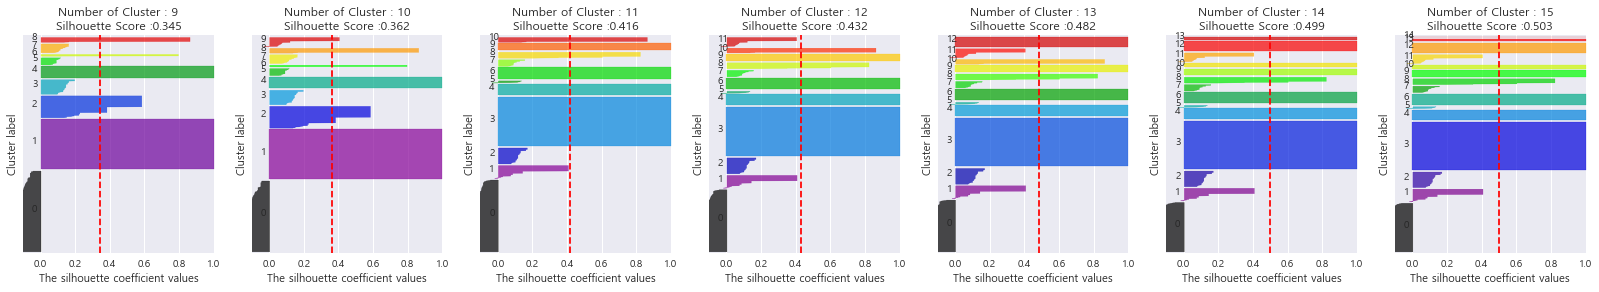

In [33]:
visualize_silhouette([9, 10, 11, 12, 13, 14, 15], train_dtm_matrix)

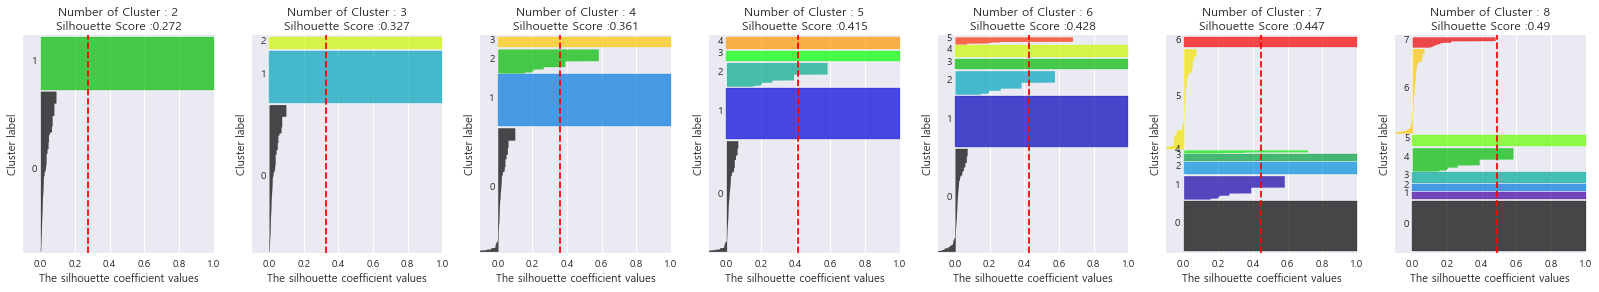

In [34]:
visualize_silhouette([2, 3, 4, 5, 6, 7, 8], train_tfidf_matrix)

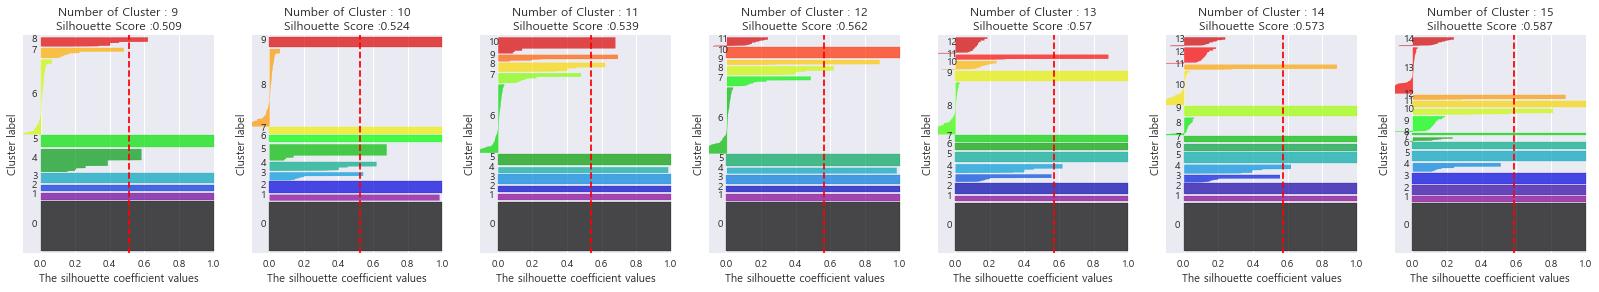

In [35]:
visualize_silhouette([9, 10, 11, 12, 13, 14, 15], train_tfidf_matrix)

In [36]:
# KMeans가 잘 수행되었는지의 판단기준은 silhouette 지수이다.
# silhouette 지수는 -1부터 1 의 값을 갖는데, 1에 가까울수록 좋은 것, -1에 가까우면 잘못 군집화가 수행되었다고 이해하면 된다.
# (동일 군집끼리는 잘 모여있을수록, 다른 군집과는 멀리 떨어져있을수록 실루엣지수가 높다)

# 단순 실루엣 지수만 높다해서 클러스터링이 잘 수행되었다고는 볼 수 없다.
# 전반적으로 모든 군집에서의 실루엣 지수가 높아야 좋은 것인데, 
# tfidf-matrix를 사용하고, n_clusters=11로 했을 때의 결과가 좋다고 판단하여 이 기준으로 클러스터링을 해보고자 한다.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=11)
kmeans.fit(train_tfidf_matrix)
label = kmeans.predict(train_tfidf_matrix)

In [37]:
labels = pd.Series(label, index=X_train.index)
kmeans_df = pd.concat([X_train['Creditor'], labels], axis=1)
kmeans_df.columns = ['Creditor', 'Label']

creditor = pd.get_dummies(pd.Series(label), prefix='Creditor').drop('Creditor_10', axis=1)
creditor.index = X_train.index
X_train = pd.concat([X_train, creditor], axis=1)

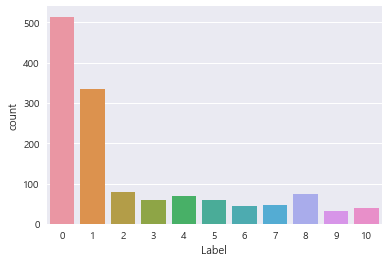

In [38]:
sns.countplot(kmeans_df['Label'])

In [39]:
# 군집이 잘 수행되었나 보기 위해 Creditor와 KMeans에 의해 부여된 Label을 동시에 확인해보고자 한다.
# 데이터가 많아서 50개 정도만 샘플링하여 보도록 하겠다.
index = np.random.randint(low=0, high=X_train.shape[0], size=50)
kmeans_df.iloc[index].sort_values(by='Label')

# 결과를 보면 기타는 기타끼리, 국민은행, 우리은행, 하나은행, 캐피탈, 수협/농협, 저축은행 등으로 잘 분류된 것으로 보인다.

,Creditor,Label
1925,히어로비케이대부,0
944,비엔케이캐피탈,0
993,베리타스에프앤아이,0
232,신괴정새,0
839,주선진,0
1852,지비자산관리,0
1148,대백저축은행,0
1485,오에스비저축은행,0
369,대경철강,0
1931,기타,1


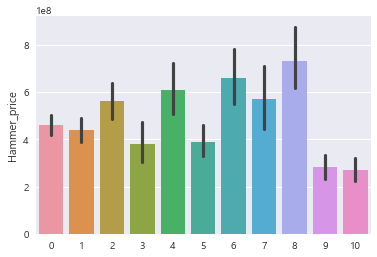

In [40]:
# label별 Hammer_price의 분포에 어느 정도 차이가 있어 보인다.
sns.barplot(x=label, y=y_train)

In [41]:
test_dtm = cnt_vectorizer.transform(X_test['Creditor'])
test_tfidf = tfidf_vectorizer.transform(X_test['Creditor'])

test_dtm_matrix = pd.DataFrame(test_dtm.toarray())
test_tfidf_matrix = pd.DataFrame(test_tfidf.toarray())

label = kmeans.predict(test_tfidf_matrix)
creditor = pd.get_dummies(pd.Series(label), prefix='Creditor').drop('Creditor_10', axis=1)
creditor.index = X_test.index
X_test = pd.concat([X_test, creditor], axis=1)

del X_train['Creditor']
del X_test['Creditor']

### 4. Highly Correlated Features -> PCA

In [42]:
X_train.columns

Index(['Auction_class', 'Claim_price', 'Auction_count',
       'Auction_miscarriage_count', 'Total_land_gross_area',
       'Total_land_real_area', 'Total_land_auction_area',
       'Total_building_area', 'Total_building_auction_area',
       'Total_appraisal_price', 'Minimum_sales_price', 'addr_li', 'addr_san',
       'Apartment_usage', 'Total_floor', 'Current_floor', 'Specific',
       'Share_auction_YorN', 'Close_result', 'point.y', 'point.x',
       'Auction_period', 'regist_period', 'Close_year', 'Appraisal_year',
       'Bid_class_개별', 'Bid_class_일괄', 'addr_do_서울', 'Appraisal_company_size',
       'Creditor_0', 'Creditor_1', 'Creditor_2', 'Creditor_3', 'Creditor_4',
       'Creditor_5', 'Creditor_6', 'Creditor_7', 'Creditor_8', 'Creditor_9'],
      dtype='object')

In [43]:
from sklearn.decomposition import PCA
# 아래의 변수끼리는 높은 상관계수 보였다 -> PCA를 통해 1차원으로 축소하고자 한다.
# (correlated 높은 변수에서 PCA를 하면 결과가 좋다)
highly_correlated = ['Total_land_real_area', 'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area', 'Total_appraisal_price', 'Minimum_sales_price']
pca = PCA(n_components=1)
pca.fit(X_train.loc[:, highly_correlated])
X_train['Area_pca'] = pca.transform(X_train.loc[:, highly_correlated])
X_test['Area_pca']  = pca.transform(X_test.loc[:, highly_correlated])

X_train.drop(highly_correlated, axis=1, inplace=True)
X_test.drop(highly_correlated, axis=1, inplace=True)

In [44]:
print( pca.explained_variance_ratio_ ) # 실제 설명하는 변동의 비율도 높다.

[0.98981611]


# Feature Selection (VIF)

In [45]:
X_train

,Auction_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,addr_li,addr_san,Apartment_usage,Total_floor,Current_floor,...,Creditor_1,Creditor_2,Creditor_3,Creditor_4,Creditor_5,Creditor_6,Creditor_7,Creditor_8,Creditor_9,Area_pca
178,1,1001178995,2,1,29642.8,0,0,0,47,40,...,0,0,1,0,0,0,0,0,0,5.030592e+07
764,1,705760169,1,0,163197.4,0,0,1,5,4,...,0,0,0,1,0,0,0,0,0,6.803967e+08
651,1,179060610,1,0,28347.0,0,0,1,21,11,...,0,0,0,0,0,0,0,0,0,-3.085755e+08
1183,1,0,2,1,27318.1,0,0,1,15,9,...,1,0,0,0,0,0,0,0,0,-2.197963e+06
513,1,60479094,1,0,3071.7,0,0,1,15,14,...,0,0,0,0,0,0,0,0,0,-3.859489e+08
71,1,650000000,1,0,9951.0,0,0,0,33,27,...,1,0,0,0,0,0,0,0,0,-8.911654e+07
581,1,142723400,1,0,5169.9,0,0,1,16,7,...,0,0,0,0,0,0,0,0,0,-3.972032e+08
704,1,242593966,1,0,50993.7,0,0,1,15,7,...,1,0,0,0,0,0,0,0,0,-4.888787e+05
1047,1,246892870,2,1,905.5,0,0,1,6,3,...,0,0,0,0,0,0,0,0,0,6.713884e+08
483,1,98612480,2,1,139.4,0,0,1,6,6,...,0,0,0,0,0,0,0,0,0,-4.696106e+08


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [47]:
vif.sort_values(by='VIF Factor', ascending=False)[:10]

,VIF Factor,features
21,992.723922,addr_do_서울
13,552.528540,point.y
14,164.366983,point.x
3,19.264761,Auction_miscarriage_count
2,19.209300,Auction_count
23,9.465712,Creditor_0
24,8.077139,Creditor_1
25,3.061078,Creditor_2
31,2.985472,Creditor_8
27,2.803663,Creditor_4


In [48]:
# point.x와 point.y는 'addr_do'와 매우 correlated 되어 있기 때문에 VIF 높았다
# Auction_miscarriage_count는 Auction_count와 correlated 되어 있었으며, 당연히 VIF도 높았다.
# 가장 높은 VIF 값의 feature를 하나 제거한 후 다시 VIF 확인하는 방식으로 feature selection을 진행하였다.
remove_col = ['point.x', 'point.y', 'Auction_miscarriage_count']

X_train.drop(remove_col, axis=1, inplace=True)
X_test.drop(remove_col, axis=1, inplace=True)

# Estimate

### 1. 행렬 통해 회귀계수 추정 

In [49]:
from numpy.linalg import inv
def get_coef(X, y):
    X = pd.concat([pd.Series([1]*X.shape[0], index=X.index), X], axis=1) # 1벡터추가 (intercept를 위해)
    X = X.values
    y = y.values
    return (inv(np.matmul(X.T, X)).dot(X.T)).dot(y) # 행렬 통해 회귀 계수 추정

def predict(X, coef):
    X = pd.concat([pd.Series([1]*X.shape[0], index=X.index), X], axis=1) # 1벡터추가 (intercept를 위해)
    X = X.values
    predicted_y = np.matmul(X, coef) # predicted coef를 X에 곱해 predicted y를 구한다.
    return predicted_y

def mse(X, true_y, pred_y):
    n, k = X.shape # 전체 데이터의 수,intercept를 제외한 feature의 수
    degree_of_freedom = n-k-1 # 전체데이터의 수 - intercept 포함 feature의 수
    true_y = true_y.values
    sse_value = np.sum(np.square(true_y-pred_y)) # 잔차제곱합 = SSE
    mse_value = sse_value / degree_of_freedom # SSE / df = MSE
    return mse_value

In [50]:
coef = get_coef(X_train, y_train)
pred = predict(X_test, coef)
mse(X_test, y_test, pred)

3527954095968631.5

### 2. sklearn 이용

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

lr = LinearRegression()
lr.fit(X_train, y_train) # train 데이터로 training
pred2 = lr.predict(X_test) # test 데이터 predict

mean_squared_error(y_test, pred2) # get MSE 

3333308352145645.0

### 3. 1번, 2번 비교

In [52]:
print(coef[1:]) # 만든 함수에서 추정한 회귀계수 
print('='*70)
print(lr.coef_) # sklearn 함수
(coef[1:] - lr.coef_) # 약간의 차이 존재

[-1.08300490e+07  3.20629918e-03 -2.86024773e+07  3.10598659e+01
 -2.32613872e+06 -2.04493474e+07  1.60924953e+07 -1.14510103e+05
 -5.12550598e+05  1.91644275e+07 -2.58547935e+07  1.58750868e+07
  3.80408220e+04  2.03645168e+03  7.86666817e+06 -3.61678210e+06
 -1.30233234e+07 -5.93901038e+07  7.98860380e+06 -3.67711133e+06
 -2.86584461e+06 -2.95983744e+06 -1.47289085e+07  1.98246316e+05
 -1.24496286e+07 -4.40311347e+06 -1.80864748e+07 -3.31266286e+05
  1.63097618e+07 -1.24017686e+07  7.12590866e-01]
[-1.08300493e+07  3.20630226e-03 -2.86024772e+07  3.10598654e+01
 -2.32613845e+06 -2.04493473e+07  1.60924953e+07 -1.14510091e+05
 -5.12550539e+05  1.91644270e+07 -2.58547940e+07  1.58750878e+07
  3.80408225e+04  2.03645169e+03  7.86666810e+06 -3.61678189e+06
 -1.30233238e+07 -5.93900978e+07  7.98860560e+06 -3.67711141e+06
 -2.86584462e+06 -2.95983744e+06 -1.47289086e+07  1.98245788e+05
 -1.24496285e+07 -4.40311335e+06 -1.80864746e+07 -3.31266271e+05
  1.63097620e+07 -1.24017690e+07  7.1259

array([ 2.15264395e-01, -3.07428094e-09, -1.09527275e-01,  5.34183592e-07,
       -2.63524067e-01, -9.92962494e-02, -9.18605756e-02, -1.13994024e-02,
       -5.91000956e-02,  4.92322803e-01,  4.50102828e-01, -9.71238637e-01,
       -4.66558027e-04, -1.15142807e-05,  7.37900548e-02, -2.03473690e-01,
        3.71978408e-01, -6.02280939e+00, -1.79975570e+00,  8.33930983e-02,
        1.71433059e-02, -4.37088218e-03,  8.15246515e-02,  5.27600215e-01,
       -1.03181740e-01, -1.15605547e-01, -1.99030209e-01, -1.47389147e-02,
       -2.59509591e-01,  4.67609162e-01,  2.62508881e-09])

In [53]:
print(pred[:10]) # 만든 함수에서 구한 predicted_y
print('='*70)
print(pred2[:10]) # sklearn에서 구한 predicted_y
print('='*70)

[4.41737153e+08 4.89133676e+07 9.85944638e+07 1.73852207e+08
 6.73072063e+08 7.72186043e+07 3.88302700e+08 3.25741336e+09
 9.71370583e+08 3.47859198e+08]
[4.41737152e+08 4.89133681e+07 9.85944653e+07 1.73852207e+08
 6.73072062e+08 7.72186031e+07 3.88302700e+08 3.25741336e+09
 9.71370586e+08 3.47859198e+08]
